In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
%matplotlib inline

In [89]:
rho_early = np.load("rho_early.npy")
rho_final = np.load("rho_final.npy")

In [135]:
def plot_imputation(imputed, original, xtext):
    x, y = imputed, original
    data = np.vstack([x, y])
    
    print data.shape
    
    plt.figure(figsize=(5, 5))

    axes = plt.gca()
    
    ymax = 0.06
    ymin = 0
    axes.set_xlim([ymin,ymax])
    axes.set_ylim([ymin,ymax])
    
    nbins=50

    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(data)
    xi, yi = np.mgrid[ymin:ymax:nbins*1j, ymin:ymax:nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    plt.title(xtext, fontsize=12)
    plt.ylabel(r"Early stopping $\rho$ values")
    plt.xlabel(r"Final $\rho$ values")
    
    
    plt.pcolormesh(yi, xi, np.log(1+zi.reshape(xi.shape)), cmap="Reds")
    
    #a, _, _, _ = np.linalg.lstsq(y[:,np.newaxis], x)
    l = np.linspace(ymin, ymax)
    #plt.plot(l, a * l, color='black')
    
    plt.plot(l, l, color='black', linestyle=":")

In [144]:
import scipy.stats

scipy.stats.pearsonr(rho_early[index].flatten(), rho_final[index].flatten())

(0.97594053, 0.0)

(2, 72000)


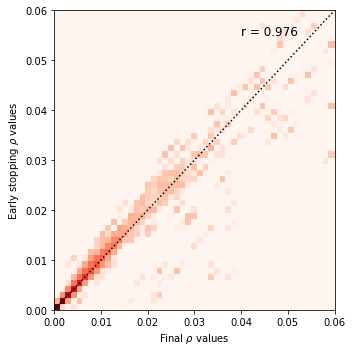

In [152]:
index = np.arange(0, 100, 1)
plot_imputation(rho_early[index].flatten(), rho_final[index].flatten(), "")
plt.text(0.04, 0.055, r"r = 0.976", size=12)
plt.tight_layout()
plt.savefig("rho.pdf", dpi=300)

In [153]:
l_t = [1480.3909, 1392.7738, 1454.725, 1418.5229, 1257.0542, 1237.9905, 1279.1227, 1184.8914, 1196.3507, 1182.3391, 1426.8427, 1183.3174, 1165.0048, 1162.5125, 1159.8098, 1167.0619, 1156.3527, 1158.7504, 1169.825, 1154.2512, 1154.3805, 1156.0835, 1162.9683, 1157.8071, 1163.2079, 1152.017, 1157.8549, 1153.9915, 1152.0983, 1158.3453, 1150.4799, 1149.7905, 1163.6245, 1151.0184, 1176.1592, 1149.3539, 1149.7104, 1150.4098, 1149.8639, 1150.5499, 1149.1685, 1166.9081, 1157.5045, 1164.3772, 1163.1091, 1150.2644, 1148.4117, 1149.6375, 1149.4023, 1154.5034, 1155.002, 1149.5034, 1153.0171, 1148.4762, 1153.6653, 1149.4071, 1151.984, 1148.7887, 1151.0099, 1149.8181, 1153.3986, 1157.9031, 1151.9741, 1149.1388, 1154.5323, 1187.3716, 1149.1289, 1149.3625, 1154.9783, 1152.5802, 1149.9915, 1174.2838, 1156.1654, 1149.6003, 1149.1353, 1149.4901, 1155.402, 1150.1915, 1157.3344, 1157.7388, 1151.8379, 1149.5973, 1151.1622, 1153.6, 1159.5138, 1152.199, 1150.6108, 1150.8776, 1151.495, 1149.9332, 1149.6761, 1151.876, 1151.4, 1150.1533, 1171.4741, 1150.5266, 1153.2849, 1150.644, 1151.1208, 1155.3186, 1151.0659, 1163.5139, 1156.9969, 1166.5427, 1152.7299, 1153.4113, 1158.2789, 1154.0774, 1162.5116, 1152.1448, 1166.2065, 1150.2535, 1152.7269, 1151.65, 1154.8865, 1150.9662, 1150.9603, 1153.5077, 1153.2357]

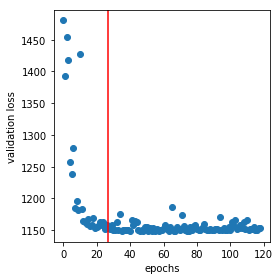

In [154]:
plt.figure(figsize=(4, 4))
plt.scatter(np.arange(len(l_t)), l_t)
plt.ylabel("validation loss")
plt.xlabel("epochs")
plt.axvline(x=27, ymax=1400, color="red")
plt.tight_layout()
plt.savefig("1M_training_curves.pdf", dpi=300)